In [127]:
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot

In [128]:
data = pd.read_csv('./DATABASE DOLAR BLUE EN BOLIVIA - Hoja1.csv', delimiter=',')

data.dropna(inplace=True)

array_data = data.to_numpy()


X_raw = array_data[:, 3]
y_raw = array_data[:, 4]



X = np.char.replace(X_raw.astype(str), ',', '.').astype(float)
y = np.char.replace(y_raw.astype(str), ',', '.').astype(float)


m = y.size
print("m =", m)
print(np.column_stack((X, y))[:5])  # muestra primeras 5 filas combinadas

data.head()


m = 38550
[[10.13 10.17]
 [10.13 10.17]
 [10.14 10.17]
 [10.14 10.17]
 [10.13 10.18]]


,PROPIEDAD DE WWW.DOLARBLUEBOLIVIA.CLICK,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,21/07/2024 17:36:42,"6,86","6,96","10,13","10,17"
2,21/07/2024 17:44:16,"6,86","6,96","10,13","10,17"
3,21/07/2024 17:59:16,"6,86","6,96","10,14","10,17"
4,21/07/2024 18:14:15,"6,86","6,96","10,14","10,17"
5,21/07/2024 18:29:15,"6,86","6,96","10,13","10,18"


In [129]:
print(array_data)

[['21/07/2024 17:36:42' '6,86' '6,96' '10,13' '10,17']
 ['21/07/2024 17:44:16' '6,86' '6,96' '10,13' '10,17']
 ['21/07/2024 17:59:16' '6,86' '6,96' '10,14' '10,17']
 ...
 ['31/07/2025 10:40:51' '6,86' '6,96' '13,85' '13,87']
 ['31/07/2025 10:55:56' '6,86' '6,96' '13,84' '13,88']
 ['31/07/2025 11:10:53' '6,86' '6,96' '13,84' '13,88']]


In [130]:
print(X)

[10.13 10.13 10.14 ... 13.85 13.84 13.84]


In [131]:
print(y)

[10.17 10.17 10.17 ... 13.87 13.88 13.88]


In [132]:
def plotData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=5, mec='k')
    pyplot.xlabel('Dólar paralelo (compra) [Bs]')
    pyplot.ylabel('Dólar paralelo (venta) [Bs]')
    pyplot.title('Relación entre dólar paralelo compra y venta')
    pyplot.grid(True)


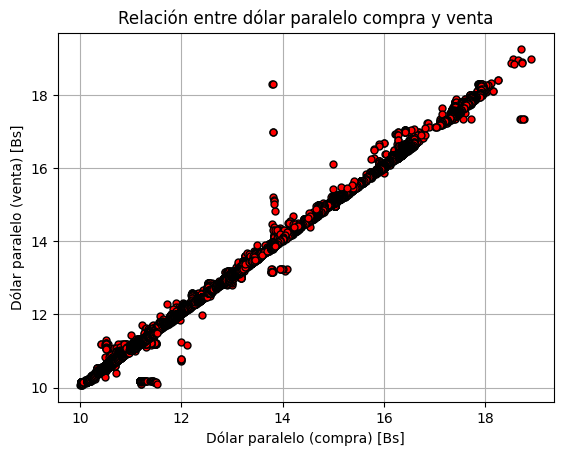

In [133]:
plotData(X, y)

In [ ]:

X = np.stack([np.ones(m), X], axis=1)
print(X)

[[ 1.   10.13]
 [ 1.   10.13]
 [ 1.   10.14]
 ...
 [ 1.   13.85]
 [ 1.   13.84]
 [ 1.   13.84]]


In [135]:
#funcion del costo
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [136]:
#desenso por gradiente

def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

In [137]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 500
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history)

Theta encontrada por descenso gradiente: 0.0753, 0.9992
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[np.float64(57.83546895490861), np.float64(40.29287908258566), np.float64(28.07162335355948), np.float64(19.557538905660767), np.float64(13.62609981276734), np.float64(9.49389159536285), np.float64(6.6151391561739), np.float64(4.609621724979703), np.float64(3.2124539399719025), np.float64(2.239100235511511), np.float64(1.5610016955708796), np.float64(1.0885962087326946), np.float64(0.7594892554305489), np.float64(0.5302129449423695), np.float64(0.3704848496294189), np.float64(0.259208352921095), np.float64(0.1816862437471249), np.float64(0.12767953366491416), np.float64(0.09005510851925036), np.float64(0.06384359874432105), np.float64(0.045583033405096354), np.float64(0.03286158890981418), np.float64(0.023999039414025525), np.float64(0.01782483542231845), np.float64(0.013523499583398385), np.float64(0.010526919815648331), np.float64(0.008439314020685202), np.float64(0.00

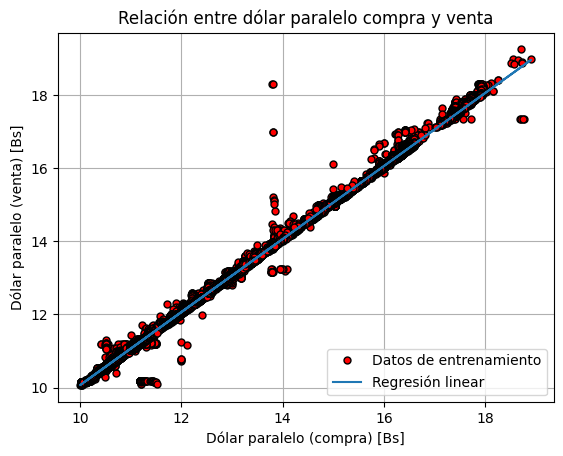

In [138]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [139]:
# Valores de dólar paralelo compra para los que quieres predecir
compra1 = 10.50
compra2 = 11.00

# Predicciones con tu modelo theta
predict1 = np.dot([1, compra1], theta)
predict2 = np.dot([1, compra2], theta)

print(f'Para un dólar paralelo compra de {compra1:.2f} Bs, se predice un dólar paralelo venta de {predict1:.2f} Bs')
print(f'Para un dólar paralelo compra de {compra2:.2f} Bs, se predice un dólar paralelo venta de {predict2:.2f} Bs')


Para un dólar paralelo compra de 10.50 Bs, se predice un dólar paralelo venta de 10.57 Bs
Para un dólar paralelo compra de 11.00 Bs, se predice un dólar paralelo venta de 11.07 Bs
